In [1]:
library(dplyr)
library(arrow)
library(ggplot2)
library(xml2)
library(ggsoccer)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp



In [2]:
frames <- read_parquet("/home/lz80/rdf/sp161/shared/soccer-decision-making-r/sportec/passes.parquet")


In [3]:
frames |> colnames()

 [1] "event_id"               "event_type"             "period_id"             
 [4] "timestamp"              "end_timestamp"          "ball_state"            
 [7] "ball_owning_team"       "team_id"                "player_id"             
[10] "coordinates_x"          "coordinates_y"          "end_coordinates_x"     
[13] "end_coordinates_y"      "receiver_player_id"     "set_piece_type"        
[16] "result"                 "success"                "match_id"              
[19] "EVENT_ID"               "FRAME_NUMBER"           "n_RECFRM"              
[22] "frame_id"               "ball_owning_team_id"    "x_velo"                
[25] "y_velo"                 "object_id"              "s"                     
[28] "x"                      "y"                      "z"                     
[31] "period_id_p5"           "timestamp_p5"           "frame_id_p5"           
[34] "ball_state_p5"          "ball_owning_team_id_p5" "x_velo_p5"             
[37] "y_velo_p5"              "s_p5"    

In [4]:
t_play <- frames |> filter(event_id == '18477700000007')

In [6]:
t_play |> select(is_intended) |> unique()

# A tibble: 2 × 1
  is_intended
  <lgl>      
1 FALSE      
2 TRUE       

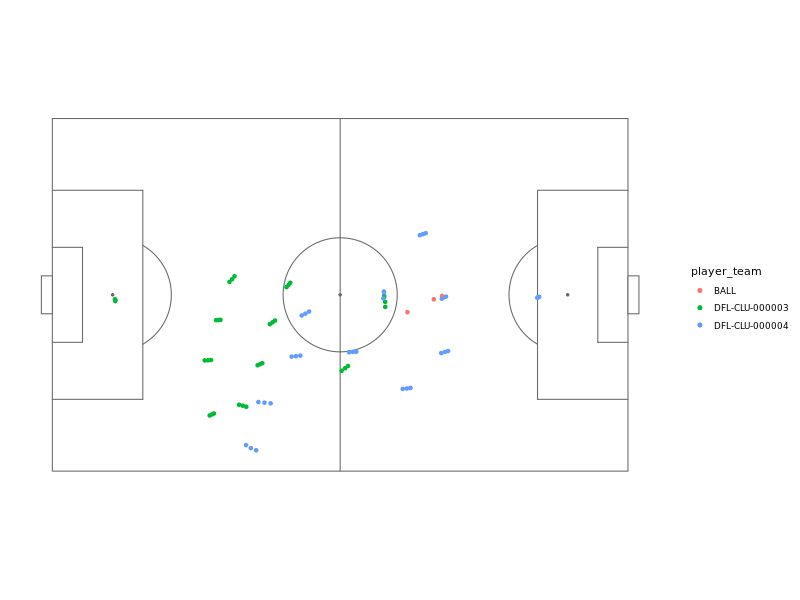

In [7]:
pitch_sportec <- list(
  length = 105,
  width = 68,
  penalty_box_length = 16.5,
  penalty_box_width = 40.32,
  six_yard_box_length = 5.5,
  six_yard_box_width = 18.32,
  penalty_spot_distance = 11,
  goal_width = 7.32,
  origin_x = -52.5,
  origin_y = -34
)

ggplot() + annotate_pitch(dimension = pitch_sportec) + geom_point(data = t_play, aes(x = x, y = y, col = player_team)) + theme_pitch() + geom_point(data = t_play, aes(x = x_m5, y = y_m5, col = player_team)) + geom_point(data = t_play, aes(x = x_p5, y = y_p5, col = player_team))

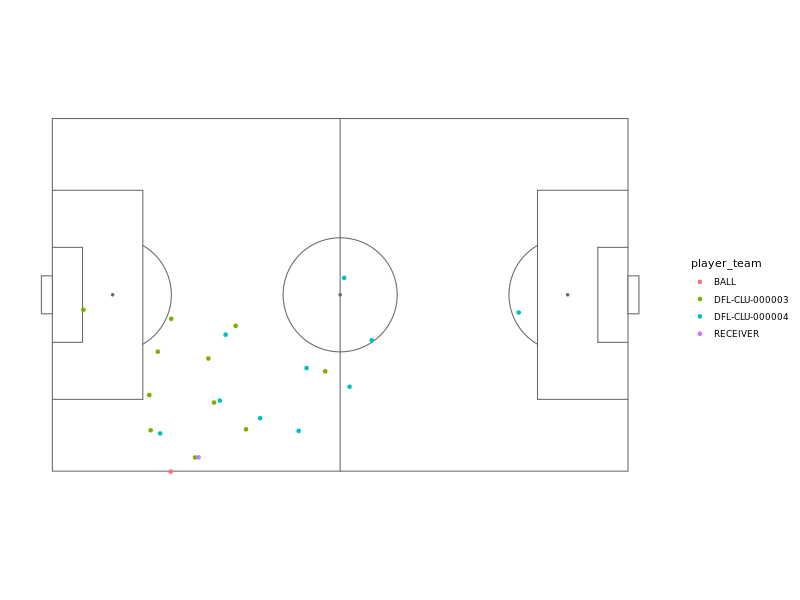

In [8]:
t_play |> mutate(
  player_team = ifelse(is_intended, "RECEIVER", player_team)) |>  ggplot() + annotate_pitch(dimension = pitch_sportec) + geom_point(aes(x = x_rec, y = y_rec, col = player_team)) +  theme_pitch() 